In [21]:
from os import listdir
from PIL import Image
import numpy as np
import datetime as dt
import time
import tensorflow as tf
from keras.regularizers import l2
import matplotlib as plt
import matplotlib.pyplot as plt

#---------------------------------------------------------------
#DEFS


In [22]:

def getDateStr():
        return str('{date:%Y%m%d_%H%M}').format(date=dt.datetime.now())

def getTimeMin(start, end):
        return (end - start)/60

def select_image(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = image.resize((img_x,img_y))

    return np.asarray(image)

def load_class(diretorio, classe, imagens, labels):
    for filename in listdir(diretorio):
        path = diretorio + filename

        try:
            imagens.append(select_image(path))
            labels.append(classe)
        except:
            print("Falha ao ler imagem")
        
    return imagens, labels

#---------------------------------------------------------------
# Variables
EPOCHS = 50
CLASS = 3
FILE_NAME = 'model_TeP_'
img_x, img_y = 32,32
img_size = (img_x, img_y)
img_shape = img_size + (3,)
img_channel = 3
learning_rate = 0.01
train_dir = 'dataset/Train'
test_dir = 'dataset/Test'
#---------------------------------------------------------------


In [23]:

# Main

print('[INFO] [INICIO]: ' + getDateStr() + '\n')

print('[INFO] Download dataset')

print(listdir(train_dir))
start = time.time()

test_set = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 20, zoom_range=0.2, horizontal_flip=True)
test_generator = test_set.flow_from_directory(test_dir, target_size= img_size)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 20, zoom_range=0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size= img_size)


[INFO] [INICIO]: 20230207_1721

[INFO] Download dataset
['antena', 'bateria', 'disjuntor']
Found 8 images belonging to 3 classes.
Found 87 images belonging to 3 classes.


[INFO] Treinando a CNN...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 flatten_4 (Flatten)         (None, 28800)             0         
                                                                 
 dense_15 (Dense)            (None, 32)                921632    
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)           

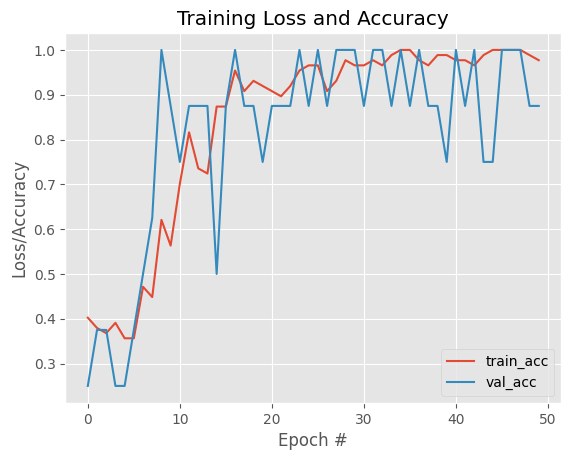

In [24]:

print("[INFO] Treinando a CNN...")
model = tf.keras.models.Sequential([
    
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = img_shape),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), input_shape = img_shape),
    

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(CLASS, activation = 'softmax')

])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate), metrics = ['accuracy'], loss='categorical_crossentropy')

model.summary()

history = model.fit(train_generator, validation_data = test_generator, epochs = EPOCHS)

EPOCHS = len(history.history["loss"])

print("[INFO] Salvando modelo treinado ...")

file_date = getDateStr()

end = time.time()

print("[INFO] Tempo de execução da CNN: %.1f min" %(getTimeMin(start,end)))

print('[INFO] Summary: ')
model.summary()

plt.style.use("ggplot")

plt.figure()

plt.plot(np.arange(0, EPOCHS), history.history["accuracy"], label="train_acc")

plt.plot(np.arange(0, EPOCHS), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")

plt.xlabel("Epoch #")

plt.ylabel("Loss/Accuracy")

plt.legend()

print("[INFO] Sumarizando loss e accuracy para os datasets 'train' e 'test'")

awnser = input("Deseja salvar o modelo? (y/n): ")

print(history.history['accuracy'])

if(awnser == 'y'):
    model.save('models/'+FILE_NAME+file_date+'.h5')
    print('[INFO] modelo: '+FILE_NAME+file_date+'.h5 salvo!')

print('\n[INFO] [FIM]: ' + getDateStr())
print('\n\n')